# MA3K7 Assignment 3 

**Student Number: 2110308**

In [9]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scpy
import statsmodels.api as sm
from collections import Counter

The code below runs 1000 simulations of the problem and returns the top 10 highest-occurring final numbers.

In [2]:
def simulate_paper_draws(total_pieces=2024, simulations=1000):
    final_numbers = []  # List to store the final number of each simulation
    
    for _ in range(simulations):
        # Initialise the hat with numbers from 1 to 2024
        hat = list(range(1, total_pieces + 1))
        
        # Repeat the process until only one piece remains
        while len(hat) > 1:
            # Randomly select two pieces
            draw = random.sample(hat, 2)
            # Calculate the difference and remove the drawn pieces
            hat.remove(draw[0])
            hat.remove(draw[1])
            # Add the difference back to the hat
            hat.append(abs(draw[0] - draw[1]))
        
        # Add the final number to the list
        final_numbers.append(hat[0])
    
    return final_numbers

# Simulate the problem 1000 times
final_numbers = simulate_paper_draws()

# Count the occurrences of each final number and find the top 10 most common
most_common_final_numbers = Counter(final_numbers).most_common(10)

# Display the top 10 most common final numbers
print("Top 10 most common final numbers and their counts:")
for number, count in most_common_final_numbers:
    print(f"Number: {number}, Count: {count}")


Top 10 most common final numbers and their counts:
Number: 278, Count: 8
Number: 114, Count: 8
Number: 22, Count: 8
Number: 18, Count: 8
Number: 2, Count: 8
Number: 154, Count: 7
Number: 140, Count: 7
Number: 42, Count: 7
Number: 124, Count: 7
Number: 364, Count: 7


The code below runs 10,000 simulations of the problem and plots the result.

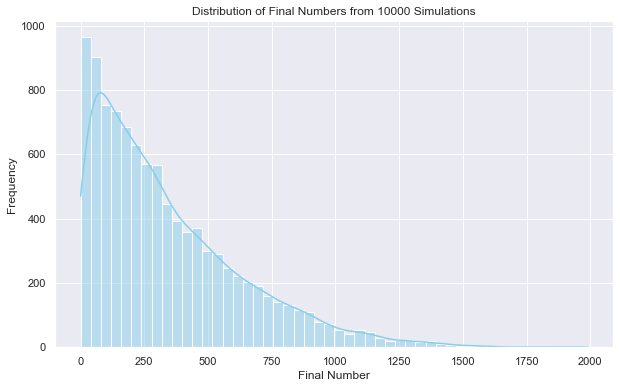

In [11]:
def simulate_paper_draws_plot(total_pieces=2024, simulations=10000):
    final_numbers = []  # List to store the final number of each simulation
    
    for _ in range(simulations):
        # Initialise the hat with numbers from 1 to total_pieces
        hat = list(range(1, total_pieces + 1))
        
        # Repeat the process until only one piece remains
        while len(hat) > 1:
            # Randomly select two pieces
            draw = random.sample(hat, 2)
            # Calculate the difference and remove the drawn pieces
            hat.remove(draw[0])
            hat.remove(draw[1])
            # Add the difference back to the hat
            hat.append(abs(draw[0] - draw[1]))
        
        # Add the final number to the list
        final_numbers.append(hat[0])
    
    return final_numbers

# Run 10,000 simulation and collect final numbers
final_numbers = simulate_paper_draws_plot(simulations=10000) 

# Plot the distribution of final numbers using seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(final_numbers, bins=50, kde=True, color="skyblue")
plt.title('Distribution of Final Numbers from 10000 Simulations')
plt.xlabel('Final Number')
plt.ylabel('Frequency')
plt.show()



The code below runs 50,000 simulations of the original problem and returns the largest final number produced by the simulations.

In [12]:
def simulate_paper_draws_largest_final_number(total_pieces=2024, simulations=50000):
    largest_final_number = 0  # Initialize the largest final number tracker
    
    for _ in range(simulations):
        # Initialize the hat with numbers from 1 to total_pieces
        hat = list(range(1, total_pieces + 1))
        
        # Repeat the process until only one piece remains
        while len(hat) > 1:
            # Randomly select two pieces
            draw = random.sample(hat, 2)
            # Calculate the difference and remove the drawn pieces
            hat.remove(draw[0])
            hat.remove(draw[1])
            # Add the difference back to the hat
            hat.append(abs(draw[0] - draw[1]))
        
        # Update the largest final number if the current final number is larger
        final_number = hat[0]
        if final_number > largest_final_number:
            largest_final_number = final_number
    
    return largest_final_number

largest_final_number = simulate_paper_draws_largest_final_number()
print(f"The largest final number produced by the 50,000 simulations is: {largest_final_number}")




The largest final number produced by the 50,000 simulations is: 1936


The code below runs 50,000 simulations on the numbers 1 through 2023 to determine whether 0 ever occurs as the final value.

In [13]:
def simulate_for_zero(total_pieces=2023, simulations=50000):
    for simulation in range(simulations):
        # Initialise the hat with numbers from 1 to total_pieces
        hat = list(range(1, total_pieces + 1))
        
        # Repeat the process until only one piece remains
        while len(hat) > 1:
            # Randomly select two pieces
            draw = random.sample(hat, 2)
            # Calculate the difference and remove the drawn pieces
            hat.remove(draw[0])
            hat.remove(draw[1])
            # Add the difference back to the hat
            difference = abs(draw[0] - draw[1])
            hat.append(difference)
            
            # Check if 0 is the final number
            if len(hat) == 1 and hat[0] == 0:
                print('Yes')  # 0 appears as the final number
                return  # Stop the simulation as soon as 0 is found
        
    # If the loop completes without finding a 0
    print('No')  # 0 never appears as the final number


simulate_for_zero()


Yes


The code below plots final value distributions for three different conditions on the original problem.

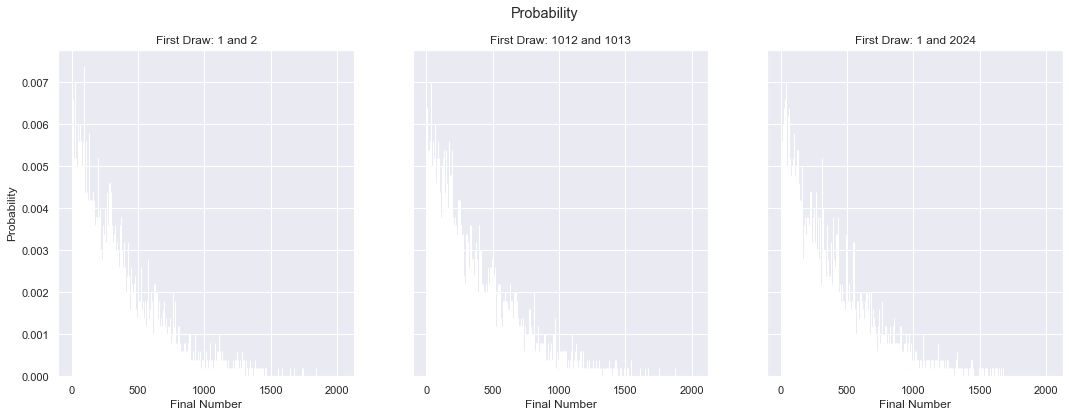

In [15]:
def simulate_modified_paper_draws(total_pieces, simulations, first_draw):
    final_numbers = []  # List to store the final number of each simulation
    
    for _ in range(simulations):
        # Initialize the hat with numbers from 1 to total_pieces
        hat = list(range(1, total_pieces + 1))
        
        # Perform the first draw based on the condition
        hat.remove(first_draw[0])
        hat.remove(first_draw[1])
        difference = abs(first_draw[0] - first_draw[1])
        hat.append(difference)
        
        # Repeat the process until only one piece remains
        while len(hat) > 1:
            # Randomly select two pieces
            draw = random.sample(hat, 2)
            # Calculate the difference and remove the drawn pieces
            hat.remove(draw[0])
            hat.remove(draw[1])
            # Add the difference back to the hat
            hat.append(abs(draw[0] - draw[1]))
        
        # Add the final number to the list
        final_numbers.append(hat[0])
    
    return final_numbers

# Number of simulations
simulations = 5000

# Run simulations for each condition
condition1 = simulate_modified_paper_draws(2024, simulations, (1, 2))
condition2 = simulate_modified_paper_draws(2024, simulations, (1012, 1013))
condition3 = simulate_modified_paper_draws(2024, simulations, (1, 2024))

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
bins = np.linspace(-0.5, 2024.5, 2026, endpoint=True)

axs[0].hist(condition1, bins, density=True)
axs[0].set_title('First Draw: 1 and 2')
axs[0].set_xlabel('Final Number')
axs[0].set_ylabel('Probability')

axs[1].hist(condition2, bins, density=True)
axs[1].set_title('First Draw: 1012 and 1013')
axs[1].set_xlabel('Final Number')

axs[2].hist(condition3, bins, density=True)
axs[2].set_title('First Draw: 1 and 2024')
axs[2].set_xlabel('Final Number')

plt.suptitle('Probability')
plt.savefig("2024_numbers_in_a_hat_problem_histogram_comparison.png")
plt.show()
